### Importing the dataset and libraries

In [1]:
from sklearn.datasets import load_iris                #importing the iris dataset
from sklearn.model_selection import train_test_split  #for splitting the dataset to train and test 

import pandas as pd                                   #convert the type of the dataset to dataframe
import mglearn                                        #for plotting the results of the ML models

iris = load_iris()                                    #naming the dataset as cancer

### Looking into the dataset

Here we created a pandas dataframe to take a quick look into the dataset.

In [2]:
iris_pd = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris_pd.describe() #looking at the descriptive statistics of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Splitting and preprocessing the dataset

Next, we will split the dataset into train set and test set. Train set is used for training and validation while the test set will be used for prediction.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1) #splitting the dataset

print(X_train.shape, X_test.shape) #looking at the shape of the two sets

(112, 4) (38, 4)


Next, we will scale the train set to help improve the machine learning algorithm.

In [5]:
from sklearn.preprocessing import StandardScaler  #importing the standard scaler

scaler = StandardScaler()
scaler.fit(X_train)                           
X_train_scaled = scaler.transform(X_train)        #scaling the train dataset
X_test_scaled = scaler.transform(X_test)          #scaling the test dataset

After scaling the dataset, we are applying dimensionality reduction into the dataset by using PCA.

In [6]:
from sklearn.decomposition import PCA             #importing the PCA

pca = PCA(n_components=2)                         #getting the 2 principal components of the dataset

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Training the Models

In [7]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering          #importing the different clustering algorithms
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score    #importing the metrics for the algorithms

In [8]:
#for KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans_pred = kmeans.fit_predict(X_train_pca, y_train)
#for DBSCAN
dbscan = DBSCAN()
dbscan_pred = dbscan.fit_predict(X_train_pca, y_train)
#for agglomerative clustering (hierarchy)
agg = AgglomerativeClustering(n_clusters=3)
agg_pred = agg.fit_predict(X_train_pca, y_train)

#### KMeans

In the next line of codes, the plot and metrics for the predictions of the algorithm are provided.

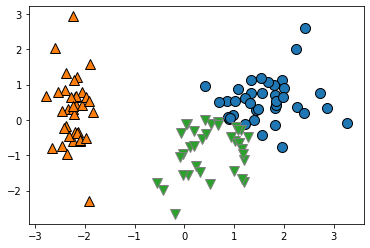

In [9]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], kmeans_pred);

In [10]:
print('KMeans ARI: {}'.format(adjusted_rand_score(y_train, kmeans_pred)))
print('KMeans Silhouette Score: {}'.format(silhouette_score(X_train_pca, kmeans_pred)))

KMeans ARI: 0.6258731179457614
KMeans Silhouette Score: 0.4969612030974774


#### DBSCAN

In the next line of codes, the plot and metrics for the predictions of the algorithm are provided.

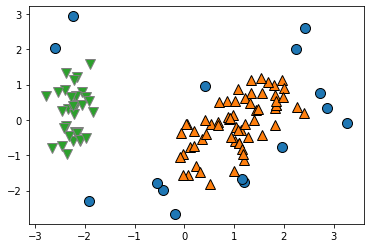

In [11]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], dbscan_pred);

In [12]:
print('DBSCAN ARI: {}'.format(adjusted_rand_score(y_train, dbscan_pred)))
print('DBSCAN Silhouette Score: {}'.format(silhouette_score(X_train_pca, dbscan_pred)))

DBSCAN ARI: 0.47570041467765256
DBSCAN Silhouette Score: 0.4751819019722797


#### Agglomerative Clustering

In the next line of codes, the plot and metrics for the predictions of the algorithm are provided.

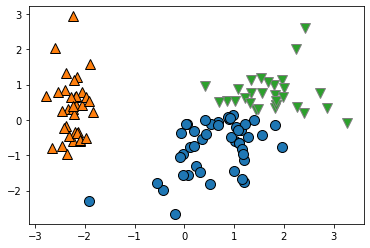

In [13]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], agg_pred);

In [14]:
print('Agglomerative Clustering ARI: {}'.format(adjusted_rand_score(y_train, agg_pred)))
print('Agglomerative Silhouette Score: {}'.format(silhouette_score(X_train_pca, agg_pred)))

Agglomerative Clustering ARI: 0.5379703512477509
Agglomerative Silhouette Score: 0.49946828815202426


### Conclusion

From the models above, we have obtained the following results:

**ARI Score:**
1. KMeans: 0.599786
2. DBSCAN: 0.475700
3. Hierarchical: 0.537970

**Silhouette Score:**
1. KMeans: 0.504843
2. DBSCAN: 0.475182
3. Hierarchical: 0.499468

Both metrics showed that KMeans clustering performs best among the three in the given dataset. It can also be shown from the scatter plots above that the KMeans algorithm has performed relatively the best for clustering the data.